In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn import metrics
#Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [91]:
df_train=pd.read_csv("train.csv",)
df_test=pd.read_csv("test.csv")
# df_train.drop(["Loan_ID"],axis=1,inplace=True)
try:
    df_train.drop(df_train.columns[[12,13,14]],axis=1,inplace=True)
except:
    pass
df_train.dtypes
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,EMI,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,0.0,128.0,360.0,1.0,Rural,355.56,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,183.33,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,333.33,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,391.67,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,197.22,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,222.22,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,702.78,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,519.44,Y


In [75]:
df_train.isnull().sum()
df_train=df_train.dropna()

In [76]:
df_train.shape
# df_train.to_excel("train_clean.xlsx")

(481, 14)

<AxesSubplot:>

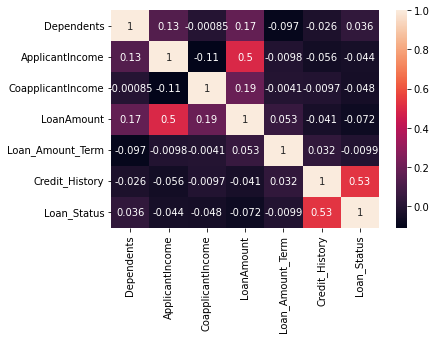

In [77]:
# df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
# df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
# df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
# df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
# df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
# df_train['Loan_Amount_Term (Months)'].fillna(df_train['Loan_Amount_Term (Months)'].mode()[0], inplace=True)
# df_train['LoanAmount(in thousands)'].fillna(df_train['LoanAmount(in thousands)'].median(), inplace=True)
df_train.loc[df_train['Loan_Status']=='Y','Loan_Status']=1
df_train.loc[df_train['Loan_Status']=='N','Loan_Status']=0
df_train["Loan_Status"]=df_train["Loan_Status"].astype(float)
df_train.isnull().sum()
corr = df_train.corr()
sb.heatmap(corr, annot=True)
# corr.style.background_gradient(cmap='coolwarm')

In [93]:
df_train["Loan_Status"]
print("This is",df_train.loc[df_train["Loan_ID"]=="LP001006"])
# df_train["Gender"]=df_train["Gender"].map({"Male":1,"Female":0}).astype(float)

This is     Loan_ID Gender Married  Dependents     Education Self_Employed  \
3  LP001006   Male     Yes         0.0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
3             2583             2358.0       120.0             360.0   

   Credit_History Property_Area     EMI Loan_Status  
3             1.0         Urban  333.33           Y  


In [ ]:

df_train["Rem_income"]=df_train["ApplicantIncome"]+df_train["CoapplicantIncome"]-df_train["LoanAmount"]/df_train["Loan_Amount_Term"]
df_test["Rem_income"]=df_test["ApplicantIncome"]+df_test["CoapplicantIncome"]-df_test["LoanAmount"]/df_test["Loan_Amount_Term"]
# df_train["Rem_income"]=df_train["LoanAmount"]/df_train["Rem_income"]
df_train["Total_income"]=df_train["ApplicantIncome"]+df_train["CoapplicantIncome"]
df_test["Total_income"]=df_test["ApplicantIncome"]+df_test["CoapplicantIncome"]
df_train.drop(["ApplicantIncome","CoapplicantIncome","Dependents"],axis=1,inplace=True)
df_test.drop(["ApplicantIncome","CoapplicantIncome","Dependents"],axis=1,inplace=True)

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

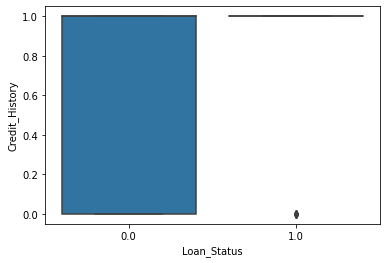

In [ ]:
# sb.boxplot(x="Loan_Status",y="Rem_income",data=df_train)
sb.boxplot(x="Loan_Status",y="Credit_History",data=df_train)

<AxesSubplot:>

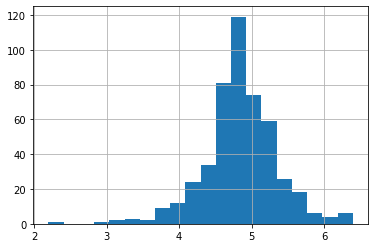

In [ ]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount']) 
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount']) 
df_train['LoanAmount_log'].hist(bins=20) 
# df_train.drop(["LoanAmount(in thousands)"],axis=1,inplace=True)

In [ ]:
# df_train.loc[df_train['Loan_Status']=='Y','Loan_Status']=1
# df_train.loc[df_train['Loan_Status']=='N','Loan_Status']=0
# df_train.astype({"Loan_Status":int})
y_train=df_train["Loan_Status"]
X_train=df_train.drop(["Loan_Status"],axis=1)
X_train=pd.get_dummies(X_train)
df_test=pd.get_dummies(df_test)
df_test.isnull().sum()
# corr = df_train.corr()
# sb.heatmap(corr, annot=True)
X_train

,Gender,LoanAmount,Loan_Amount_Term,Credit_History,Rem_income,Total_income,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,...,EMI_863.89,EMI_866.67,EMI_872.22,EMI_875,EMI_888.89,EMI_900,EMI_916.67,EMI_969.44,EMI_97.22,EMI_972.22
1,1.0,128.0,360.0,1.0,4582.644444,4583.0,4.852030,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,66.0,360.0,1.0,2999.816667,3000.0,4.189655,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,120.0,360.0,1.0,4940.666667,4941.0,4.787492,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,141.0,360.0,1.0,5999.608333,6000.0,4.948760,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1.0,267.0,360.0,1.0,9612.258333,9613.0,5.587249,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,71.0,360.0,1.0,2899.802778,2900.0,4.262680,1,0,1,...,0,0,0,0,0,0,0,0,0,0
610,1.0,40.0,180.0,1.0,4105.777778,4106.0,3.688879,0,1,1,...,0,0,0,0,0,0,0,0,0,0
611,1.0,253.0,360.0,1.0,8311.297222,8312.0,5.533389,0,1,1,...,0,0,0,0,0,0,0,0,0,0
612,1.0,187.0,360.0,1.0,7582.480556,7583.0,5.231109,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

x_train,x_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.3,random_state=0)

In [ ]:
model = LogisticRegression() 
predictors=["Credit_History","Rem_income","Total_income","LoanAmount_log"]
model.fit(x_train[predictors], y_train)
pred_cv = model.predict(x_cv[predictors])
accuracy_score(y_cv,pred_cv)
pred_test = model.predict(df_test[predictors])
Submission=pd.DataFrame({"Loan_ID":df_test["Loan_ID"],"Loan_Status":pred_test})
# submission=pd.read_csv("Sample_Submission.csv")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').